This dataset covers the target variable of 'charges' (Continuous data) applied to an individual based on 6 features or variables:
Smoking status (Categorical data), Sex (Categorical data), Body mass index (BMI) (Continuous data), Region that the individual is from (Categorical data), the number of children they have (Categorical data) and Age (Categorical data).

Libraries and modules were imported throughout the notebook at the relevant sections.

Here, the dataset was read and initially investigated for basic information such as null values, the spread of data etc.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# data accessed from: https://www.kaggle.com/teertha/ushealthinsurancedataset
import itertools
from sklearn import preprocessing
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file = pd.read_csv('insurance.csv')
df = pd.DataFrame(file)
print(df.shape)
print(df.dtypes)
print(df.isnull().values.any())
print(df.head())
print(df.describe())

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
False
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750  

The above showed us that the dataset was clean with no null values and a modest dataset with a total of 1338 rows of data.

Below, a manual approach was used to create a new dataframe where categorical variables were mapped to a numerical representation. The sklearn function Label_encoder() could also have been used.

In [ ]:
df = df[['age','sex','bmi','children','smoker','region','charges']]
df_dum = df[['age','sex','bmi','children','smoker','region','charges']]
df_dum['sex'] = df_dum['sex'].map({'female': 1, 'male': 0})
df_dum['smoker'] = df_dum['smoker'].map({'yes': 1, 'no': 0})
df_dum['region'] = df_dum['region'].map({'southwest': 0,'southeast': 1,'northeast':2,'northwest':3})

In [ ]:
df_dum2 = df_dum
df_dum2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Here, some data was plotted, starting with the target variable against a continuous variable where we would expect to see a change in insurance charges.
Here we see that there are potentially 3 general groups of charges that apply, all gradually increasing with age.

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


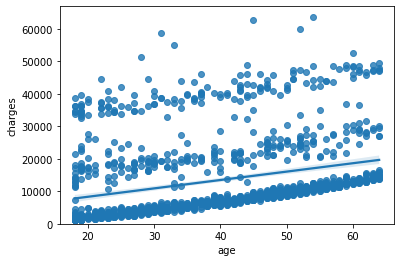

In [ ]:
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)
print(df[["age","charges"]].corr())

Repeating this with the bmi category, we see 3 general clusters of data points emerge.

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


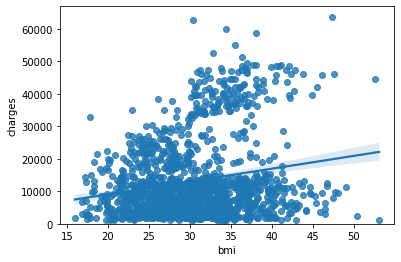

In [ ]:
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)
print(df[["bmi","charges"]].corr())

To make a clear and unbiased investigation with no working assumptions on specific variables as above, a heatmap correlation matrix was used below to compare all variables against each other, with specific interest against the charges variable. We see that smoker, age and bmi are most positively correlated, respectively, against the target variable, charges.

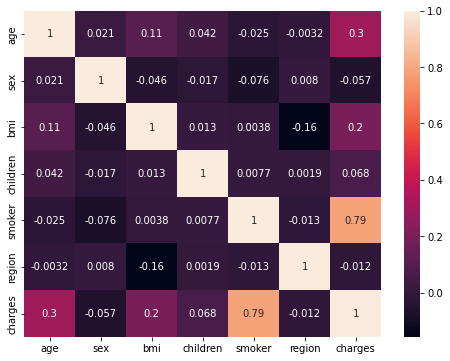

In [ ]:
df_dum.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_dum.corr(), annot = True)

To better visualise this, a standard pairplot was used (with the parameter corner set to True to remove duplication in the matric) and the hue was changed to the variable that correlated most highly with charges (smoker). This now suggested that there were potentially 4 general groups of data when viewing the BMI graph, two groups of smokers, one of which overlaps with 2 distinct groups of non-smokers. This was only an assumption based on visualisation.

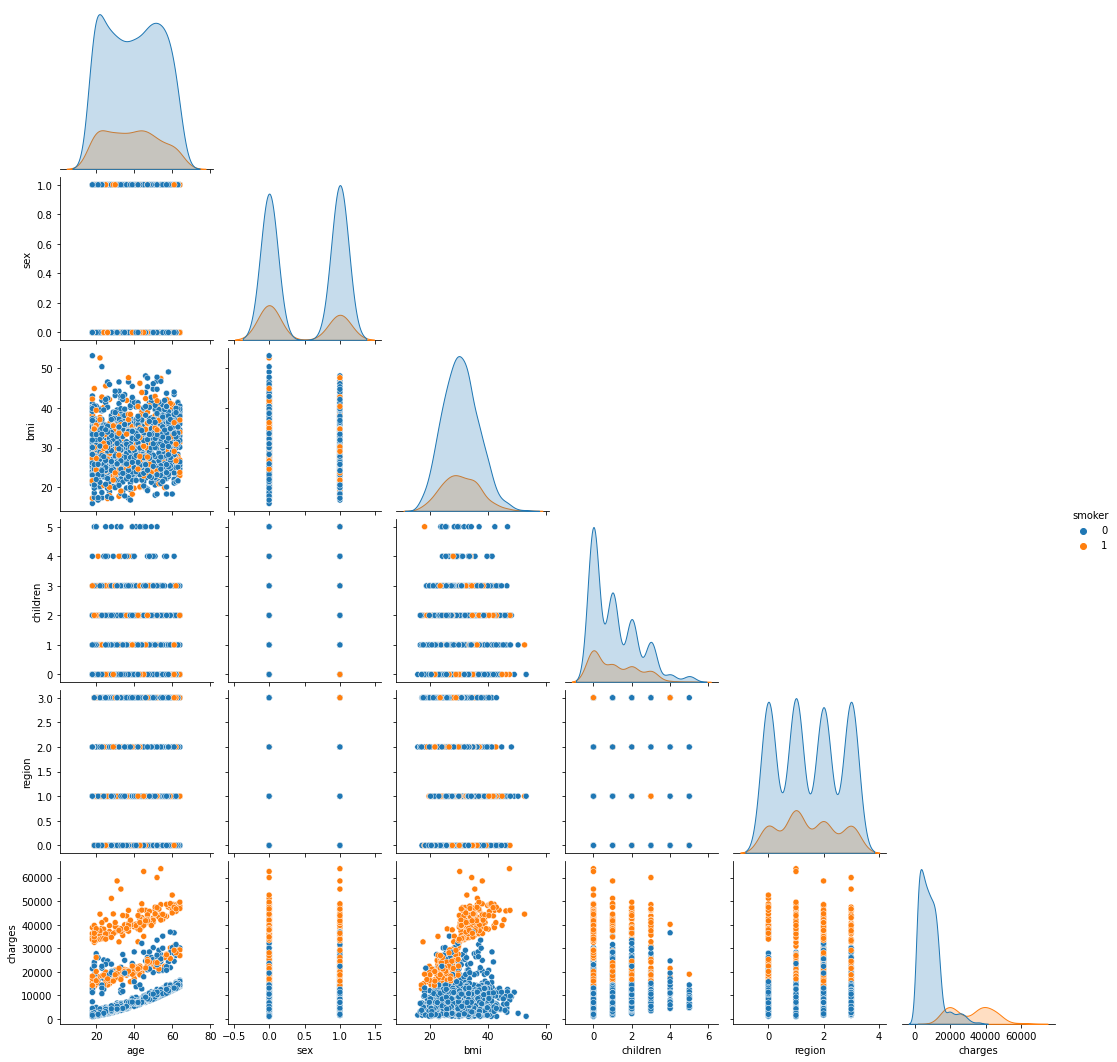

In [ ]:
sns.pairplot(df_dum, hue="smoker", corner=True)

To give an initial idea of the statistical likelihood that the correlations we see are of any practicable statistical confidence, we can investigate the pearson coefficient against a P value below for our most strongly positively correlated variable (smoker status); we see a very low p value, indicating a strong statistical confidence that the result is unlikely to be due to chance.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_dum['smoker'], df_dum['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7872514304984775  with a P-value of P = 8.271435842176839e-283


To further investigate and visualise any further patterns in the data, a 4D graph was employed. Here, it now becomes apparent that there is a cut-off of charges increasing for smokers at a BMI of approximately 30 (indicating that being registered as obese (reference: https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_dis.htm) may be a contributing factor to the increase in charges).
There were also scattered red dots of much higher charges compared to the average black and dark red dots in the non smoker section of the graph, indicating outliers/noise in the data.

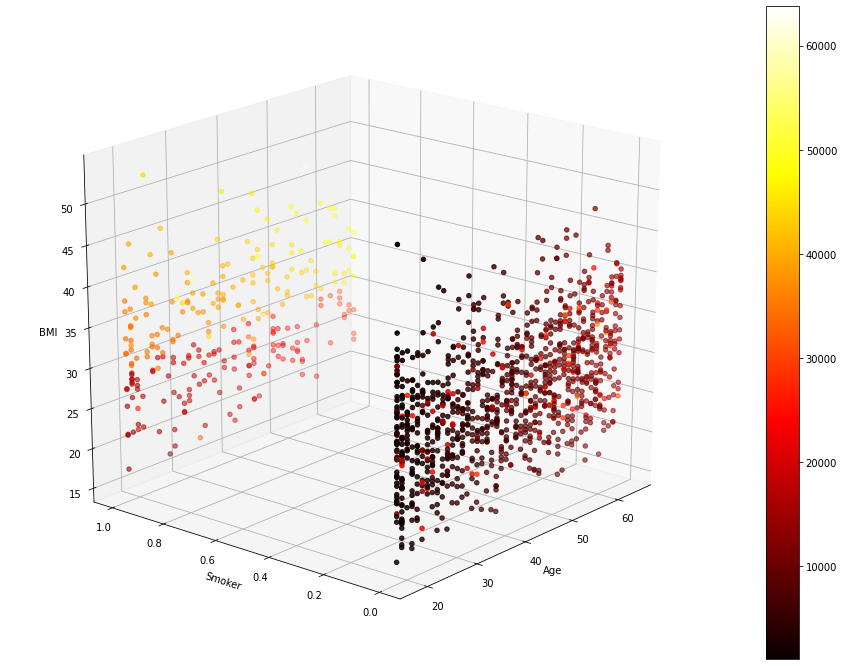

In [ ]:
#4D graph
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')

x = df_dum['age']
y = df_dum['smoker']
z = df_dum['bmi']
c = df_dum['charges']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('Age')
ax.set_ylabel('Smoker')
ax.set_zlabel('BMI')
ax.view_init(20, 220)
plt.show()

A new dataframe was created and caterories of BMI was added to the dataframe according tot he above reference from the NIH.

In [ ]:
df_dum3 = df_dum2

In [ ]:
bmi_categories = []

for x in df_dum3['bmi']:
    if x <18.5:
        bmi_categories.append(0)
    elif x>=18.5 and x<25:
        bmi_categories.append(1)
    elif x>=25 and x<30:
        bmi_categories.append(2)
    elif x>=30 and x<35:
        bmi_categories.append(3)
    elif x>=35 and x<40:
        bmi_categories.append(4)
    else:
        bmi_categories.append(5)
df_cats = df_dum3
df_cats['bmicat'] = bmi_categories
df_cats.head(10)

,age,sex,bmi,children,smoker,region,charges,bmicat
0,19,1,27.900,0,1,0,16884.92400,2
1,18,0,33.770,1,0,1,1725.55230,3
2,28,0,33.000,3,0,1,4449.46200,3
3,33,0,22.705,0,0,3,21984.47061,1
4,32,0,28.880,0,0,3,3866.85520,2
5,31,1,25.740,0,0,1,3756.62160,2
6,46,1,33.440,1,0,1,8240.58960,3
7,37,1,27.740,3,0,3,7281.50560,2
8,37,0,29.830,2,0,2,6406.41070,2
9,60,1,25.840,0,0,3,28923.13692,2


KMeans was then used as a generic method to cluster the data and assess if there was any underlying clusters of data not already seen in the exploratory data analysis. The 'Elbow method' was used to then identify the likely  suitable number for the K value to use and plot. Data was subjected to the standard scaler function and transformed.

   age  sex     bmi  children  smoker  region      charges  bmicat  k cluster
0   19    1  27.900         0       1       0  16884.92400       2          1
1   18    0  33.770         1       0       1   1725.55230       3          1
2   28    0  33.000         3       0       1   4449.46200       3          3
3   33    0  22.705         0       0       3  21984.47061       1          3
4   32    0  28.880         0       0       3   3866.85520       2          3


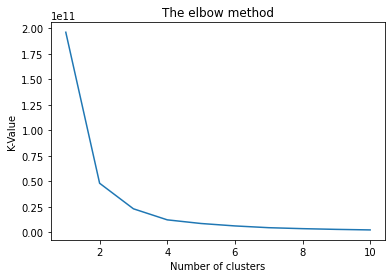

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans 
k_means = KMeans(init="k-means++", n_clusters=4, n_init=20)
X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_prediction = k_means.fit_predict(X,y)
knn_df_cats = df_cats
knn_df_cats["k cluster"] = knn_prediction
print(knn_df_cats.head(5))

kvalue = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(knn_df_cats)
    kvalue.append(kmeans.inertia_)
    
plt.plot(range(1, 11), kvalue)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('K-Value') 
plt.show()


The elbow method showed that a k value of 3 or 4 may be the suitable number to use in the following code. As seen below, the cluster analysis is assumed to have been unsuccessful, with strict vertical demarkation of the 3 clusters according to age seen. No indication of such demarkation was seen in the exploratory data analysis and as KMeans does not always work so effectively with non-isotropic dataclusters, it was assumed that the clustering seen was arbitrary and not representative of a unknown grouping.

   age  sex     bmi  children  smoker  region      charges  bmicat  k cluster
0   19    1  27.900         0       1       0  16884.92400       2          2
1   18    0  33.770         1       0       1   1725.55230       3          2
2   28    0  33.000         3       0       1   4449.46200       3          2
3   33    0  22.705         0       0       3  21984.47061       1          0
4   32    0  28.880         0       0       3   3866.85520       2          0


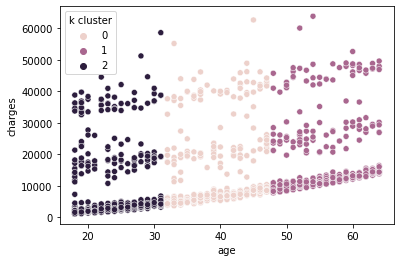

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=20)
X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_prediction = k_means.fit_predict(X,y)
knn_df_cats = df_cats
knn_df_cats["k cluster"] = knn_prediction
print(knn_df_cats.head(5))
sns.scatterplot(data=knn_df_cats, x="age", y="charges", hue="k cluster")

Multiple linear regression was then employed in the below and a range of accuracy scores for training vs test sets was plotted according to the test size using the train test split function. Mean squared error was also demonstrated as this was relevant to regression analysis. The mean squared error was very high in all cases, indicating that the accuracy is essentially irrelevant for prediction purposes, as there would be such a high margin of error in any single prediction from this regression plot.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Use the bmicats instead of just BMI
X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (936, 6) (936,)
Test set: (402, 6) (402,)


In [ ]:
#train data
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
yhat=lm.predict(X_train)
lm.intercept_
lm.coef_
mse = mean_squared_error(y_train, yhat)
print("For the training data:")
print("The mean square error of price and predicted value is: ", mse)
print("The R-square is: ", lm.score(X_train, y_train))

For the training data:
The mean square error of price and predicted value is:  37834181.72937167
The R-square is:  0.731646268809613


In [ ]:
#test data
yhat=lm.predict(X_test)
lm.intercept_
lm.coef_
mse = mean_squared_error(y_test, yhat)
print("For the test data:")
print("The mean square error of price and predicted value is: ", mse)
print("The R-square is: ", lm.score(X_test, y_test))

For the test data:
The mean square error of price and predicted value is:  33060652.31999892
The R-square is:  0.7926834940013281


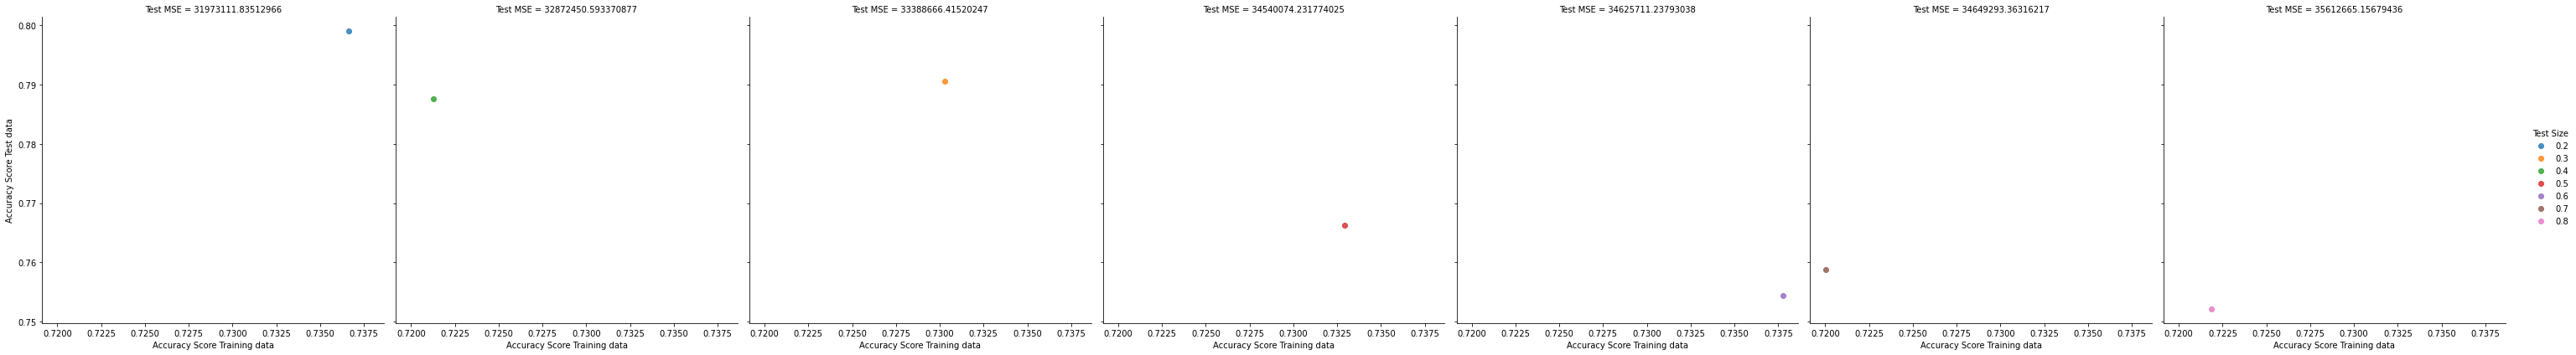

In [ ]:
#Use bmi only, appears to be more accurate very slightly than using BMI categories
X = df_cats[['smoker', 'age', 'bmi', 'sex', 'children', 'region']]
y = df_cats['charges']

test_size_list = []
test_MSE_list = []
train_score_list = []
test_score_list = []

for num in range(2,9,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = num/10)
    scaler = preprocessing.StandardScaler().fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lm = lm.fit(X_train, y_train)
    yhat=lm.predict(X_train)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_train, yhat)
    yhat=lm.predict(X_test)
    lm.intercept_
    lm.coef_
    mse = mean_squared_error(y_test, yhat)
    test_size_list.append(num/10)
    test_MSE_list.append(mse)
    train_score_list.append(lm.score(X_train, y_train))
    test_score_list.append(lm.score(X_test, y_test))
lm_results_list = {"Accuracy Score Training data":train_score_list, "Accuracy Score Test data":test_score_list, "Test Size":test_size_list, "Test MSE":test_MSE_list}
lm_df = pd.DataFrame.from_dict(lm_results_list)
sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="Test MSE", hue="Test Size", data=lm_df, height=6, aspect=1.0)

An ensemble approach was used instead, specifically a randon forest regressor with variation in the parameters of max depth and test size used to attempt to reach an optimal accuracy. This was plotted again, and the mean squared error remained unusably high.

0.8960369616257057


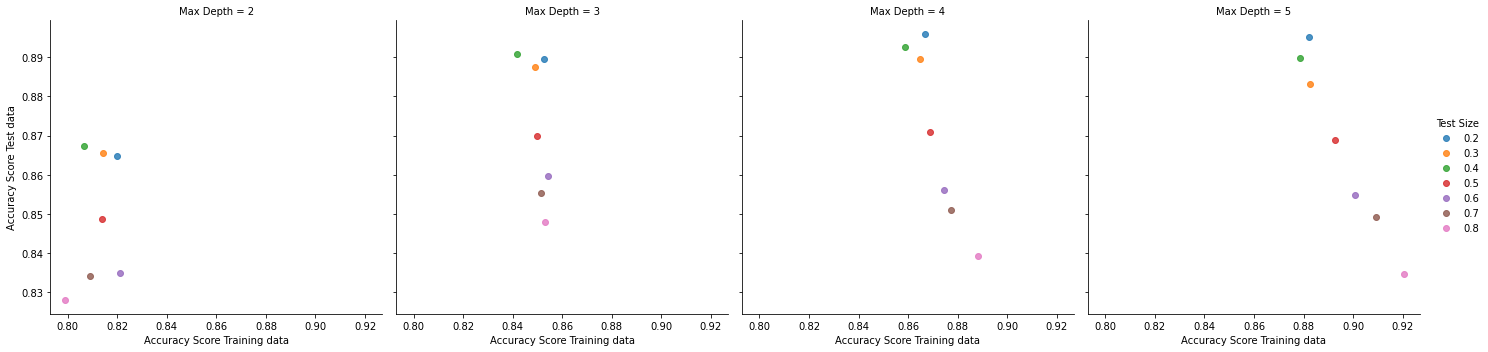

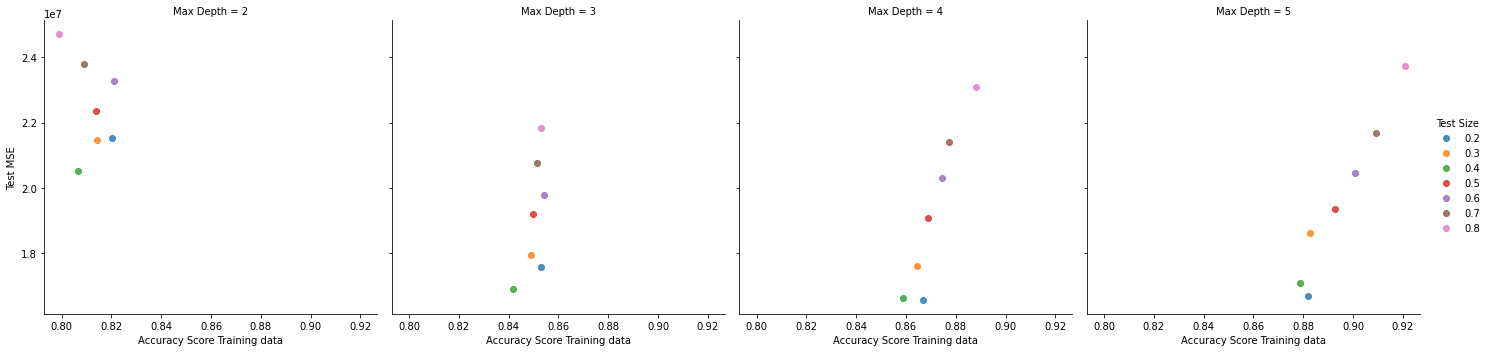

In [ ]:
#using a random forest regresor
from sklearn.ensemble import RandomForestRegressor

train_score_list = []
test_score_list = []
max_depth_list = []
test_size_list = []
test_MSE_list = []
for depth in range(2,6,1):
    for num in range(2,9,1):
        regr = RandomForestRegressor(max_depth=depth, random_state=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = num/10)
        scaler = preprocessing.StandardScaler().fit(X_train) 
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        regr.fit(X_train, y_train)
        yhat=regr.predict(X_train)
        mse = mean_squared_error(y_train, yhat)
        yhat=regr.predict(X_test)
        mse = mean_squared_error(y_test, yhat)
        train_score_list.append(regr.score(X_train, y_train))
        test_score_list.append(regr.score(X_test, y_test))
        max_depth_list.append(depth)
        test_size_list.append(num/10)
        test_MSE_list.append(mse)
regr_results_list = {"Accuracy Score Training data":train_score_list, "Accuracy Score Test data":test_score_list, "Max Depth":max_depth_list, "Test Size":test_size_list, "Test MSE":test_MSE_list}
regr_df = pd.DataFrame.from_dict(regr_results_list)
print(sns.lmplot(x="Accuracy Score Training data", y="Accuracy Score Test data", col="Max Depth", hue="Test Size", data=regr_df))
print(sns.lmplot(x="Accuracy Score Training data", y="Test MSE", col="Max Depth", hue="Test Size", data=regr_df))
print(max(test_score_list))

In [ ]:
print(regr_df[(regr_df["Max Depth"]==5)&(regr_df["Test Size"]==0.8)].columns.tolist())
print(regr_df[(regr_df["Max Depth"]==5)&(regr_df["Test Size"]==0.8)].values)

['Accuracy Score Training data', 'Accuracy Score Test data', 'Max Depth', 'Test Size', 'Test MSE']
[[9.20735252e-01 8.34668697e-01 5.00000000e+00 8.00000000e-01
  2.37517416e+07]]


A final machine learning algorithm was selected from sci-kit learn that can work with non-isotropic data and applied below. Gaussian mixture Identified clusters in the data, and distinguished with at least one of the clusters between smoker and non-smokers as shown by the swarm plot below, but the colouring on the scatter plots of age vs charges or bmi vs charges do not demonstrate a clear rational for the clustering.

   age  sex     bmi  children  ...      charges  bmicat  k cluster  gm cluster
0   19    1  27.900         0  ...  16884.92400       2          2           3
1   18    0  33.770         1  ...   1725.55230       3          2           1
2   28    0  33.000         3  ...   4449.46200       3          2           1
3   33    0  22.705         0  ...  21984.47061       1          0           1
4   32    0  28.880         0  ...   3866.85520       2          0           1

[5 rows x 10 columns]


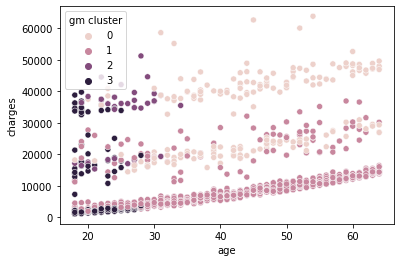

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

X = df_cats[['smoker', 'age', 'bmicat', 'sex', 'children', 'region']]
y = df_cats['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
gm = GaussianMixture(n_components=4, random_state=0)

gm_prediction = gm.fit_predict(X,y)
gm_df_cats = df_cats
gm_df_cats["gm cluster"] = gm_prediction
print(gm_df_cats.head(5))
sns.scatterplot(data=gm_df_cats, x="age", y="charges", hue="gm cluster")


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


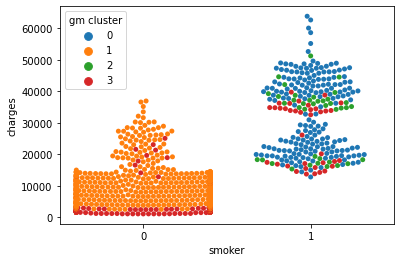

In [ ]:
print(sns.swarmplot(data=gm_df_cats, x="smoker", y="charges", hue="gm cluster"))

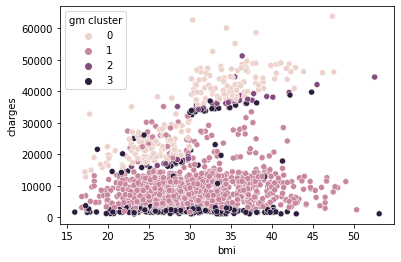

In [ ]:
sns.scatterplot(data=gm_df_cats, x="bmi", y="charges", hue="gm cluster")

To fully assess one possible reason for the high mean squared error and potential issues in the poor results from the machine learning algorithms, the data was forensically interrogated by selecting each category individually and assessing the scatter plots for each subset of data that should only be changing due to the continuous data categories of age against charges. In this case, if there were no outliers or noise in the data or additional features that cause these results in charges changes it should be seen in each plot that there would be a general increase in charges according to the increase of age, but a clear regression plot of 1 or more degree could be applied. In this case a polynomial degree 2 plot was applied as an almost perfect pearson coefficient could result in clean subplots. However, in 'noisey' subplots, such a regression rule was not possible, as seen in the plots that follow.

In cases of subplots where a pearson coefficient was greater than 0.9 and a statistical p value was less than 0.05, these were added to a variable of 'good' data which was also finally plotted. 

It should also be noted that the hue on some sub plots that follow demonstrate that there is no clear rational behind the gaussian mixture clustering, as different clusters are applied to some subplots apparently in line of the regression line data points, where it would be expected that all were part of the same cluster of data since all 6 variables are the same for each subplot, other than age.

In [ ]:
nodatalist = [] 
somedatalist = []
gooddatalist = []
for bminum in range(0,6):
    for smokenum in range(0,2):
        for childnum in range(0,6):
            for sexnum in range(0,2):
                for regionnum in range(0,4):
                    try:
                        df_test = gm_df_cats[(gm_df_cats['bmicat']==bminum)& 
                                          (gm_df_cats["smoker"]==smokenum)& 
                                          (gm_df_cats["children"]==childnum)& 
                                          (gm_df_cats["sex"]==sexnum)& 
                                          (gm_df_cats["region"]==regionnum)&
                                          (gm_df_cats["age"])&
                                          (gm_df_cats["charges"])]
                        print(df_test)
                        mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
                        lin = np.linspace(0, 70, 100)
                        plt.plot(lin, mypoly(lin), c='r',linestyle='-')
                        plt.title('Polynomial')
                        plt.grid(True)
                        plt.scatter(df_test["age"], df_test["charges"], cmap="gm cluster")
                        #plt.figure(figsize=(10,6))
                        plt.show()
                        #print(df_test[["age","charges"]].corr())
                        pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
                        print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
                        somedatalist.append([bminum,smokenum,childnum,sexnum,regionnum])
                        if p_value <= 0.05:
                          if pearson_coef > 0.90:
                            if pearson_coef < 1.0:
                              gooddatalist.append([bminum,smokenum,childnum,sexnum,regionnum])
                    except:
                        print("THIS DATAFRAME IS EMPTY:{},{},{},{},{}".format(bminum,smokenum,childnum,sexnum,regionnum))
                        nodatalist.append([bminum,smokenum,childnum,sexnum,regionnum])

Output hidden; open in https://colab.research.google.com to view.

      age  sex     bmi  children  ...      charges  bmicat  k cluster  gm cluster
24     37    0  28.025         2  ...   6203.90175       2          0           1
143    29    0  29.735         2  ...  18157.87600       2          2           1
176    38    0  27.835         2  ...   6455.86265       2          0           1
212    24    0  28.500         2  ...   3537.70300       2          2           1
387    50    0  25.365         2  ...  30284.64294       2          1           1
1039   19    0  27.265         2  ...  22493.65964       2          2           1
1173   38    0  29.260         2  ...   6457.84340       2          0           1
1298   33    0  27.455         2  ...   5261.46945       2          0           1

[8 rows x 10 columns]


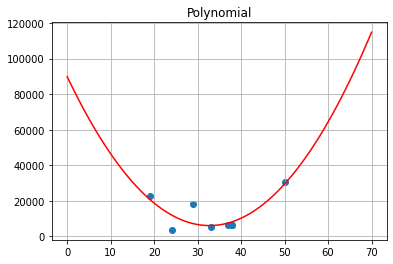

              age   charges
age      1.000000  0.202327
charges  0.202327  1.000000
The Pearson Correlation Coefficient is 0.2023265961238588  with a P-value of P = 0.6308635531359934


In [ ]:
#An example of noisey data is shown below
df_test = gm_df_cats[(gm_df_cats['bmicat']==2)  & (gm_df_cats["smoker"]==0)& (gm_df_cats["children"]==2)& (gm_df_cats["sex"]==0)& 
                  (gm_df_cats["region"]==3)]
print(df_test)
mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
lin = np.linspace(0, 70, 100)
plt.plot(lin, mypoly(lin), c='r',linestyle='-')
plt.title('Polynomial')
plt.grid(True)
plt.scatter(df_test["age"], df_test["charges"],)
plt.show()
print(df_test[["age","charges"]].corr())
pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

In [ ]:
print(len(somedatalist))
print(len(gooddatalist))

140
50


4


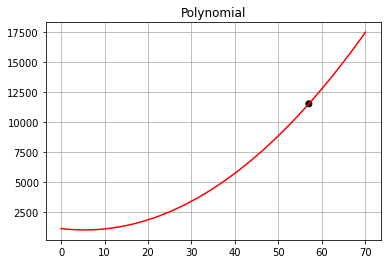

The Pearson Correlation Coefficient is 0.9952585518472251  with a P-value of P = 0.004741448152774885
5


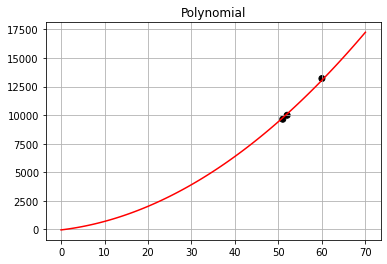

The Pearson Correlation Coefficient is 0.9950171753104445  with a P-value of P = 0.00042191250825600763
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


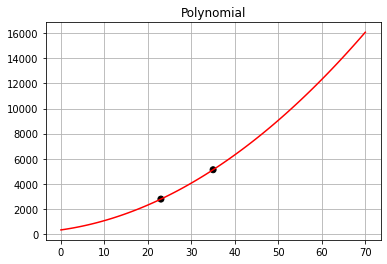

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


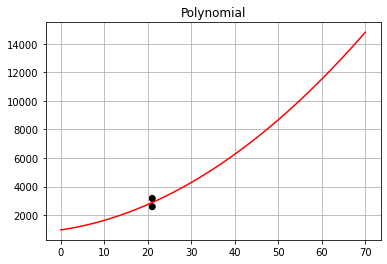

The Pearson Correlation Coefficient is nan  with a P-value of P = nan
1


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


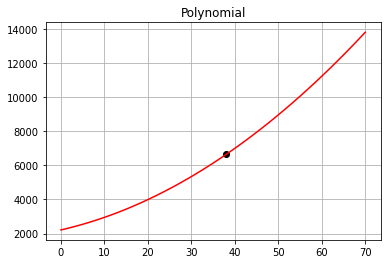

THIS DATAFRAME IS EMPTY:0,0,2,0
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


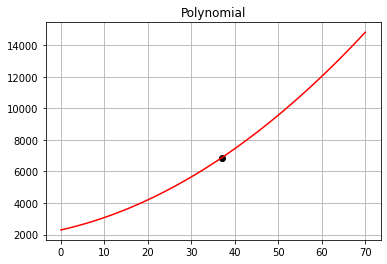

THIS DATAFRAME IS EMPTY:0,0,2,1
0
THIS DATAFRAME IS EMPTY:0,0,3,0
0
THIS DATAFRAME IS EMPTY:0,0,3,1
0
THIS DATAFRAME IS EMPTY:0,0,4,0
0
THIS DATAFRAME IS EMPTY:0,0,4,1
0
THIS DATAFRAME IS EMPTY:0,0,5,0
0
THIS DATAFRAME IS EMPTY:0,0,5,1
0
THIS DATAFRAME IS EMPTY:0,1,0,0
0
THIS DATAFRAME IS EMPTY:0,1,0,1
0
THIS DATAFRAME IS EMPTY:0,1,1,0
0
THIS DATAFRAME IS EMPTY:0,1,1,1
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


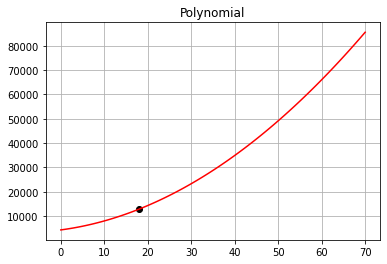

THIS DATAFRAME IS EMPTY:0,1,2,0
3


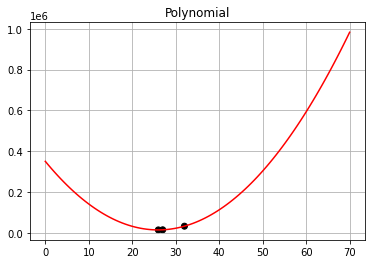

The Pearson Correlation Coefficient is 0.9916032342805698  with a P-value of P = 0.0825573029778162
0
THIS DATAFRAME IS EMPTY:0,1,3,0
0
THIS DATAFRAME IS EMPTY:0,1,3,1
0
THIS DATAFRAME IS EMPTY:0,1,4,0
0
THIS DATAFRAME IS EMPTY:0,1,4,1
0
THIS DATAFRAME IS EMPTY:0,1,5,0
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


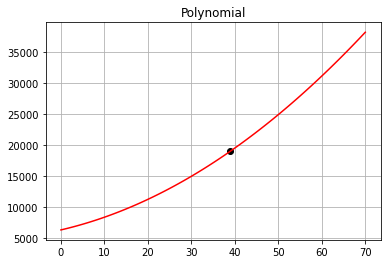

THIS DATAFRAME IS EMPTY:0,1,5,1
38


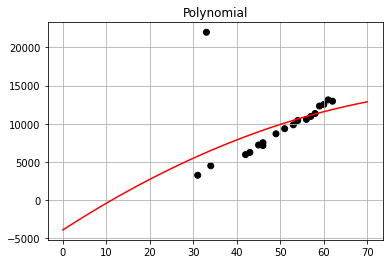

The Pearson Correlation Coefficient is 0.6630973319026102  with a P-value of P = 5.717896346814705e-06
36


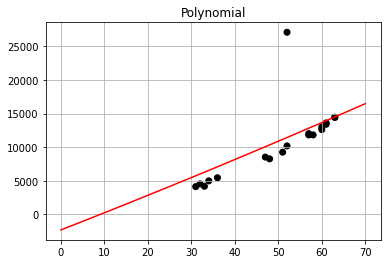

The Pearson Correlation Coefficient is 0.694331006445091  with a P-value of P = 2.6395514809971995e-06
18


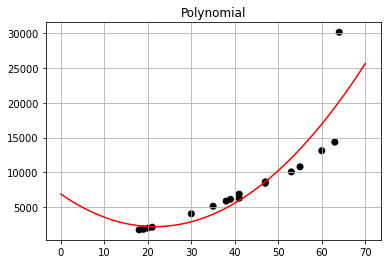

The Pearson Correlation Coefficient is 0.8397706473834705  with a P-value of P = 1.3042825209860456e-05
22


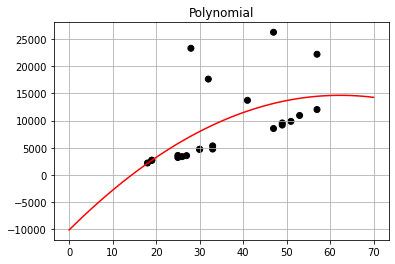

The Pearson Correlation Coefficient is 0.557547410190477  with a P-value of P = 0.007018707039263671
17


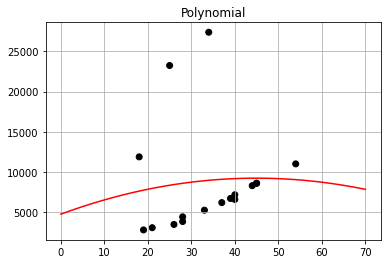

The Pearson Correlation Coefficient is 0.07157437623072486  with a P-value of P = 0.7848685596174888
18


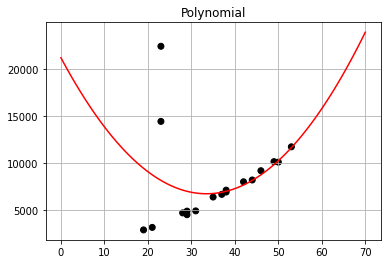

The Pearson Correlation Coefficient is 0.12975162306564547  with a P-value of P = 0.607848271673599
9


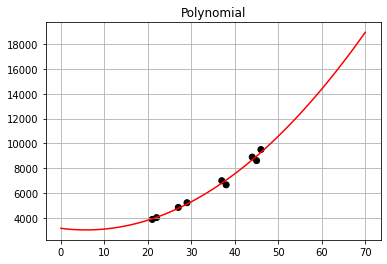

The Pearson Correlation Coefficient is 0.9878778192428365  with a P-value of P = 6.381755774042782e-07
11


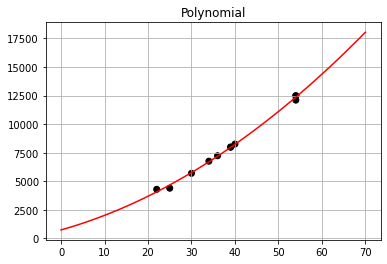

The Pearson Correlation Coefficient is 0.9958246312660115  with a P-value of P = 1.142728012211917e-10
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


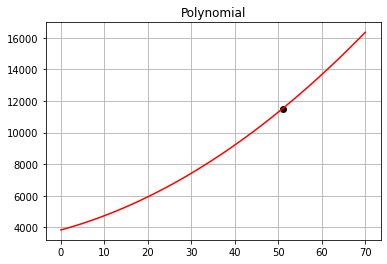

THIS DATAFRAME IS EMPTY:1,0,4,0
0
THIS DATAFRAME IS EMPTY:1,0,4,1
3


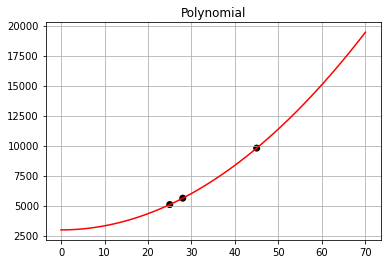

The Pearson Correlation Coefficient is 0.9993691629681879  with a P-value of P = 0.022613956062109603
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


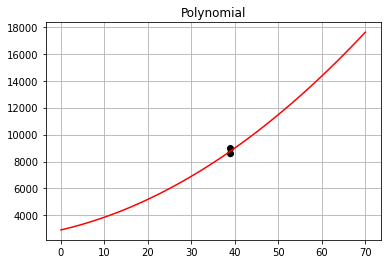

The Pearson Correlation Coefficient is nan  with a P-value of P = nan
11


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


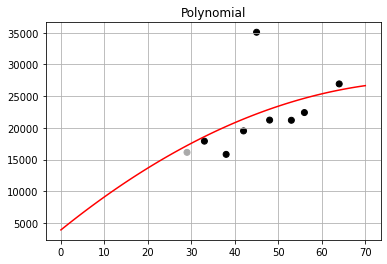

The Pearson Correlation Coefficient is 0.6580671075910411  with a P-value of P = 0.027723379544177702
12


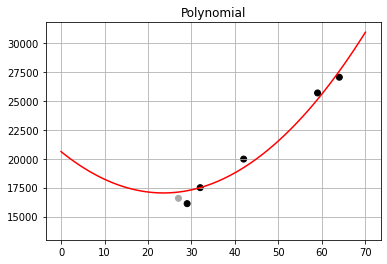

The Pearson Correlation Coefficient is 0.6886342591569988  with a P-value of P = 0.0132707122456941
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


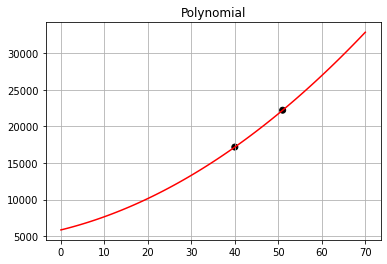

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
6


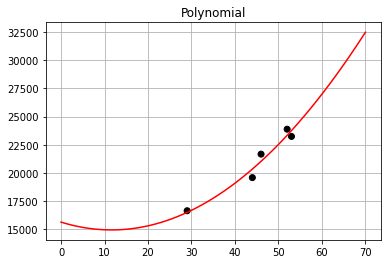

The Pearson Correlation Coefficient is 0.9761052439059449  with a P-value of P = 0.0008496175857630973
5


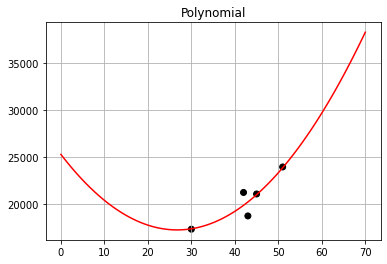

The Pearson Correlation Coefficient is 0.8856111988881105  with a P-value of P = 0.04563661961210013
5


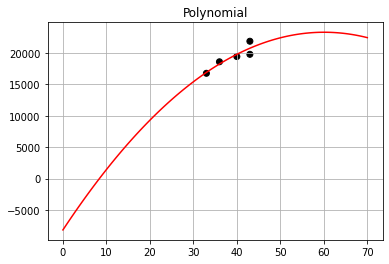

The Pearson Correlation Coefficient is 0.9053095148969585  with a P-value of P = 0.034476780543755615
4


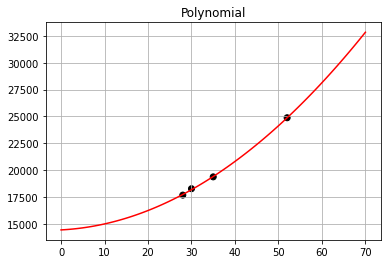

The Pearson Correlation Coefficient is 0.9981554246797415  with a P-value of P = 0.0018445753202585013
5


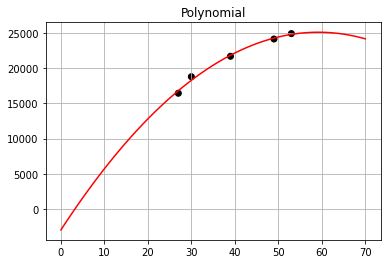

The Pearson Correlation Coefficient is 0.9831987117923277  with a P-value of P = 0.0026076553515686027
0
THIS DATAFRAME IS EMPTY:1,1,4,0
0
THIS DATAFRAME IS EMPTY:1,1,4,1
0
THIS DATAFRAME IS EMPTY:1,1,5,0
0
THIS DATAFRAME IS EMPTY:1,1,5,1
59


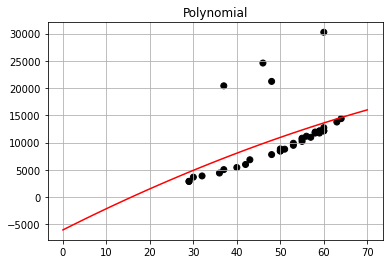

The Pearson Correlation Coefficient is 0.779476507960947  with a P-value of P = 3.52738434973414e-13
77


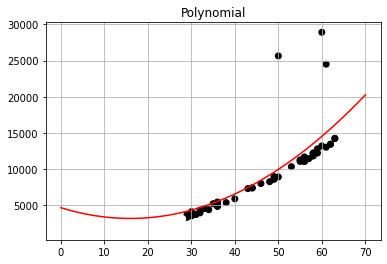

The Pearson Correlation Coefficient is 0.7632008373009611  with a P-value of P = 7.111160939688974e-16
40


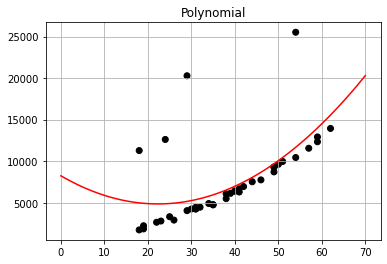

The Pearson Correlation Coefficient is 0.5711515771960104  with a P-value of P = 0.00011862583640585463
46


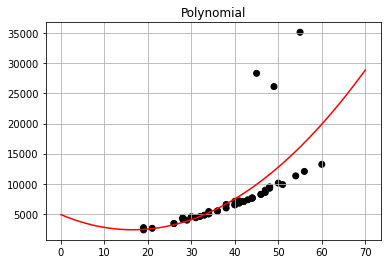

The Pearson Correlation Coefficient is 0.6257578283425651  with a P-value of P = 3.313502746075057e-06
24


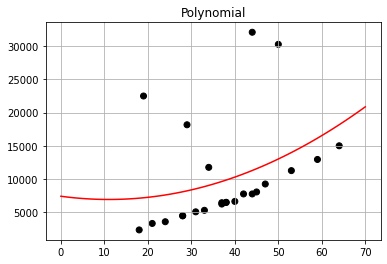

The Pearson Correlation Coefficient is 0.3395070686255721  with a P-value of P = 0.10457291830085687
22


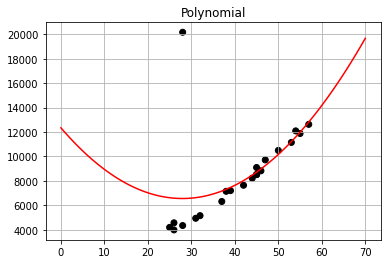

The Pearson Correlation Coefficient is 0.49283620364323916  with a P-value of P = 0.01978522833073423
13


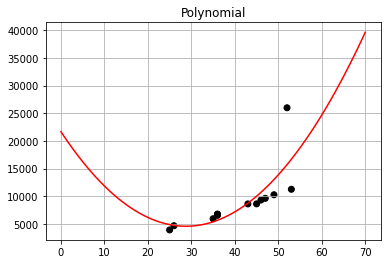

The Pearson Correlation Coefficient is 0.7053330589401616  with a P-value of P = 0.007077386155211846
16


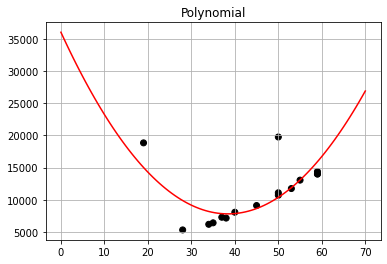

The Pearson Correlation Coefficient is 0.3350779200235505  with a P-value of P = 0.20456472086920838
4


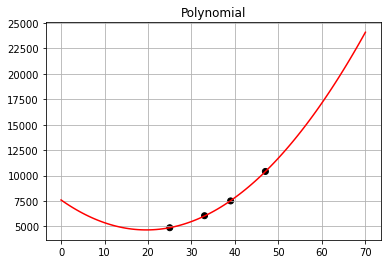

The Pearson Correlation Coefficient is 0.9782252093778993  with a P-value of P = 0.021774790622100748
6


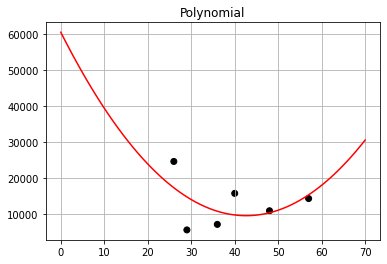

The Pearson Correlation Coefficient is -0.12885002218803496  with a P-value of P = 0.8077945718975696
4


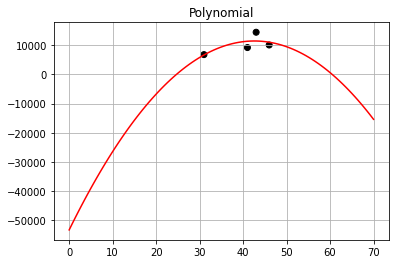

The Pearson Correlation Coefficient is 0.6702593973053116  with a P-value of P = 0.3297406026946884
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


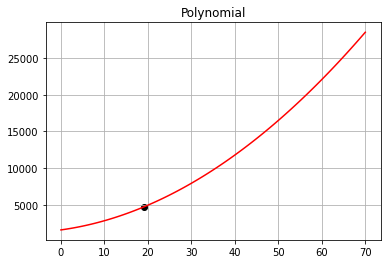

THIS DATAFRAME IS EMPTY:2,0,5,1
15


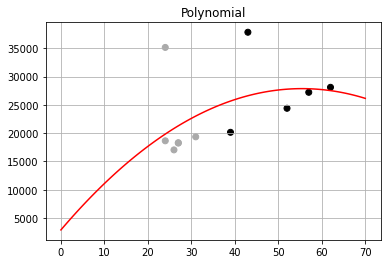

The Pearson Correlation Coefficient is 0.5605603486439046  with a P-value of P = 0.029731021598598206
16


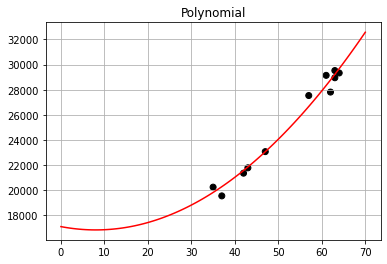

The Pearson Correlation Coefficient is 0.9794222593590216  with a P-value of P = 3.9679331850772496e-11
14


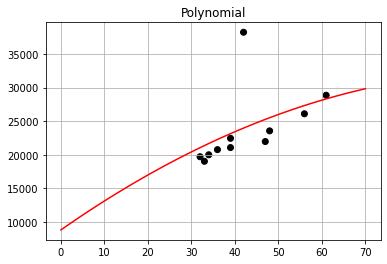

The Pearson Correlation Coefficient is 0.6569000028400076  with a P-value of P = 0.010700945313664537
9


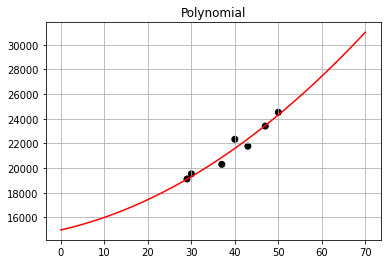

The Pearson Correlation Coefficient is 0.9807385169615499  with a P-value of P = 3.204719937922252e-06
4


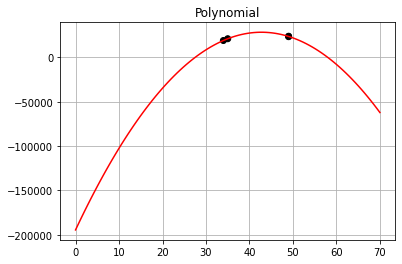

The Pearson Correlation Coefficient is 0.9421973231323556  with a P-value of P = 0.0578026768676444
3


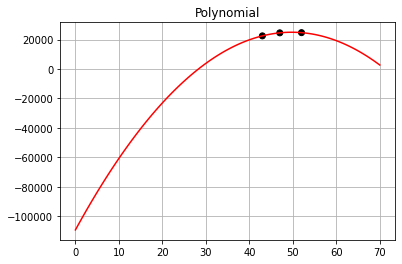

The Pearson Correlation Coefficient is 0.8607884729146977  with a P-value of P = 0.3399419091147808
8


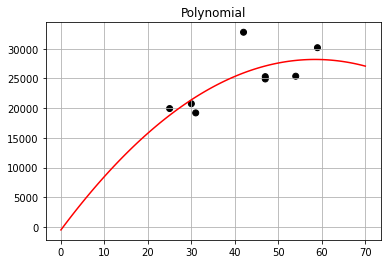

The Pearson Correlation Coefficient is 0.7125875621704307  with a P-value of P = 0.047295869008930236
3


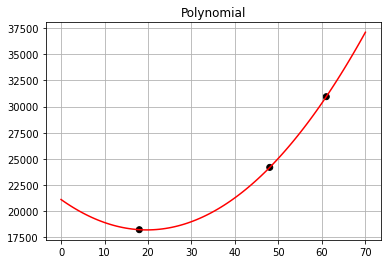

The Pearson Correlation Coefficient is 0.9661632798513446  with a P-value of P = 0.16608159634948252
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


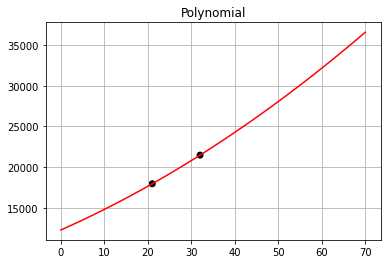

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
0
THIS DATAFRAME IS EMPTY:2,1,4,1
0
THIS DATAFRAME IS EMPTY:2,1,5,0
0
THIS DATAFRAME IS EMPTY:2,1,5,1
66


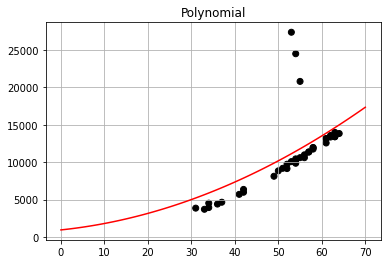

The Pearson Correlation Coefficient is 0.6747093653294685  with a P-value of P = 5.238817599623452e-10
62


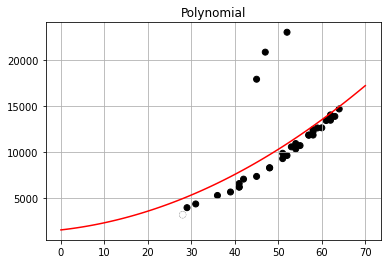

The Pearson Correlation Coefficient is 0.7269641098160146  with a P-value of P = 2.2314488017150838e-11
39


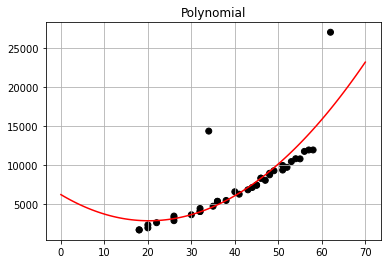

The Pearson Correlation Coefficient is 0.8088387339401292  with a P-value of P = 4.667992840913414e-10
37


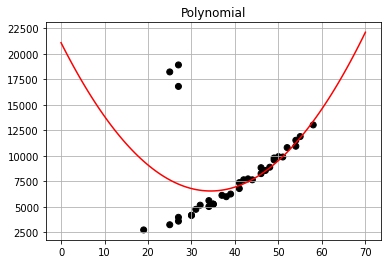

The Pearson Correlation Coefficient is 0.3110022504647428  with a P-value of P = 0.06098752865338882
24


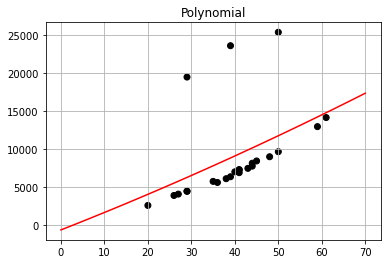

The Pearson Correlation Coefficient is 0.43876153857595585  with a P-value of P = 0.03196417788867195
34


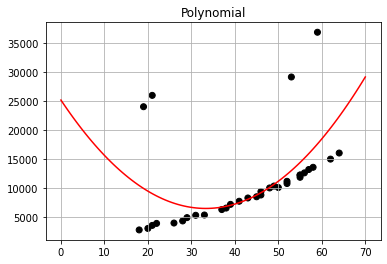

The Pearson Correlation Coefficient is 0.3978396203341206  with a P-value of P = 0.0197995661877403
22


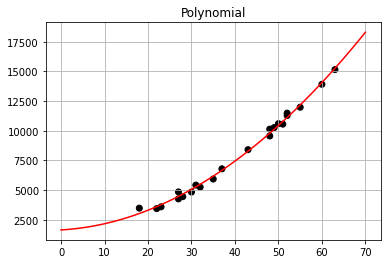

The Pearson Correlation Coefficient is 0.9898411753019385  with a P-value of P = 2.0260282382374602e-18
22


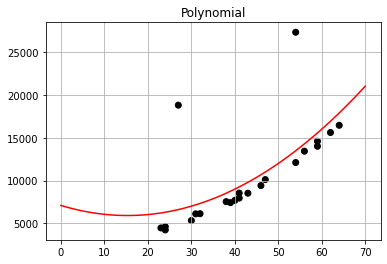

The Pearson Correlation Coefficient is 0.6490790579893941  with a P-value of P = 0.0010818537494600513
4


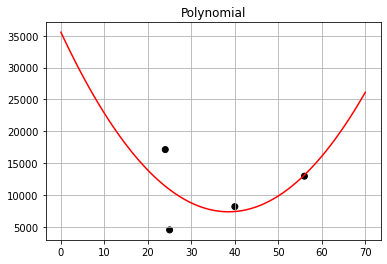

The Pearson Correlation Coefficient is 0.10376542287500608  with a P-value of P = 0.8962345771249939
3


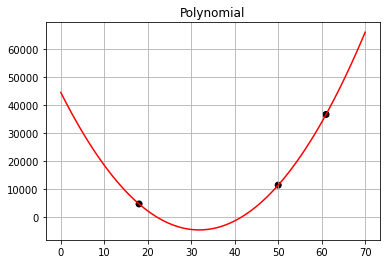

The Pearson Correlation Coefficient is 0.8267474899573601  with a P-value of P = 0.3803770894388674
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


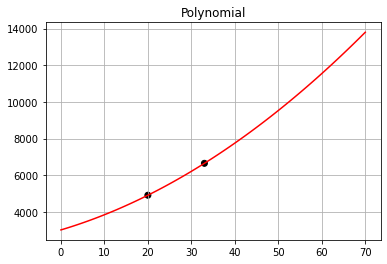

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


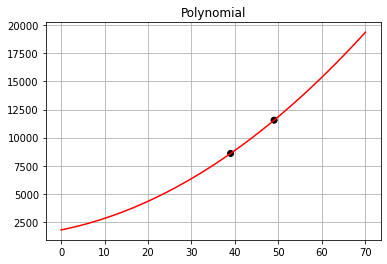

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 1.0
23


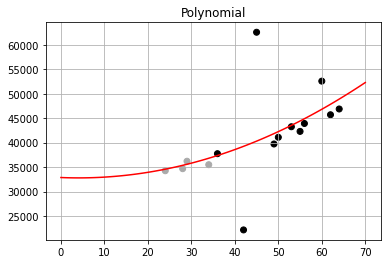

The Pearson Correlation Coefficient is 0.6369495394226051  with a P-value of P = 0.0010817324261290907
12


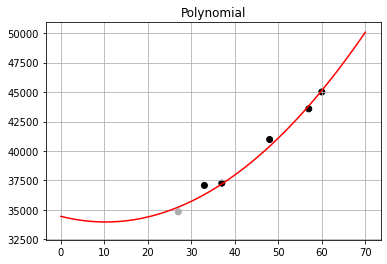

The Pearson Correlation Coefficient is 0.9532921442375233  with a P-value of P = 1.6184080634530415e-06
8


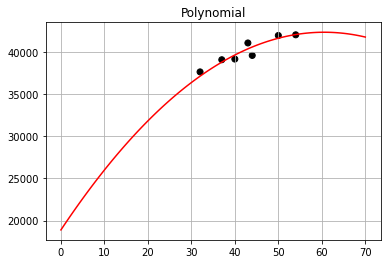

The Pearson Correlation Coefficient is 0.9498852118390673  with a P-value of P = 0.0003029490267313344
5


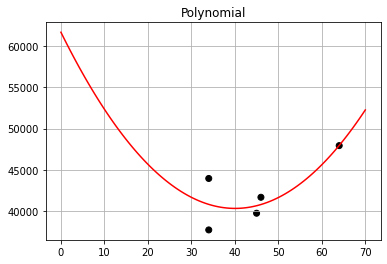

The Pearson Correlation Coefficient is 0.7137150047600471  with a P-value of P = 0.17576859705017778
8


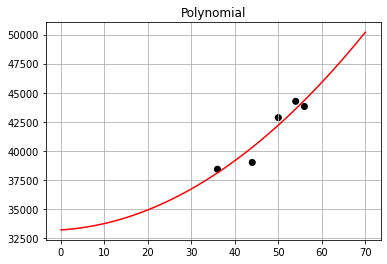

The Pearson Correlation Coefficient is 0.9782902336049055  with a P-value of P = 2.5165591625115872e-05
7


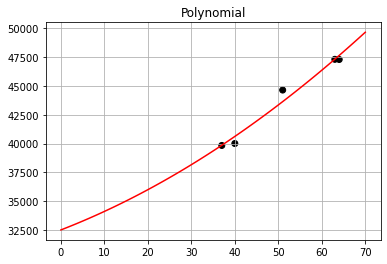

The Pearson Correlation Coefficient is 0.9895974971058975  with a P-value of P = 2.108016105526178e-05
7


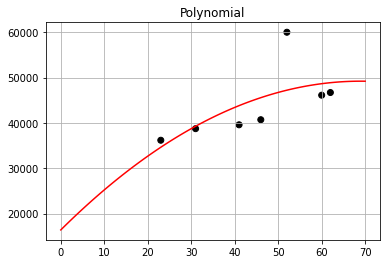

The Pearson Correlation Coefficient is 0.6441799300194164  with a P-value of P = 0.1183853116394742
3


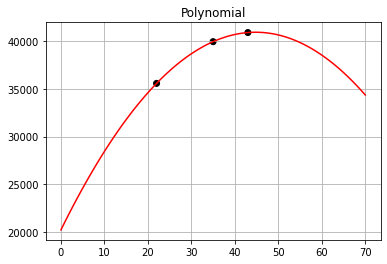

The Pearson Correlation Coefficient is 0.9762962489421377  with a P-value of P = 0.13888817760881486
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


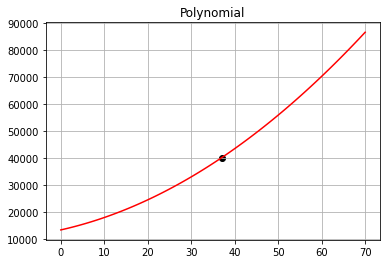

THIS DATAFRAME IS EMPTY:3,1,4,0
0
THIS DATAFRAME IS EMPTY:3,1,4,1
0
THIS DATAFRAME IS EMPTY:3,1,5,0
0
THIS DATAFRAME IS EMPTY:3,1,5,1
38


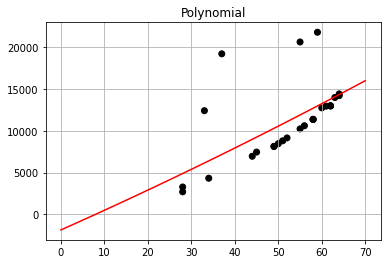

The Pearson Correlation Coefficient is 0.7576292605131139  with a P-value of P = 3.651977871641343e-08
41


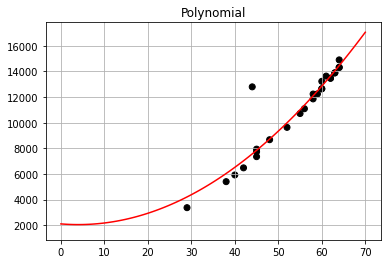

The Pearson Correlation Coefficient is 0.9032335880319047  with a P-value of P = 6.564315456773962e-16
22


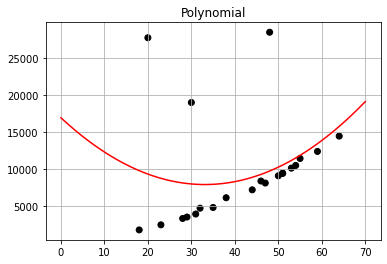

The Pearson Correlation Coefficient is 0.21031120614650994  with a P-value of P = 0.3475091918770512
19


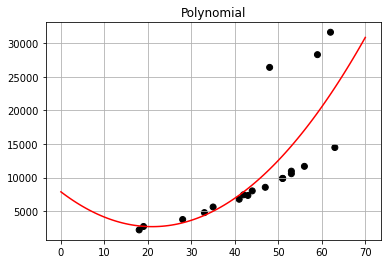

The Pearson Correlation Coefficient is 0.7109750121287647  with a P-value of P = 0.0006438340179935989
16


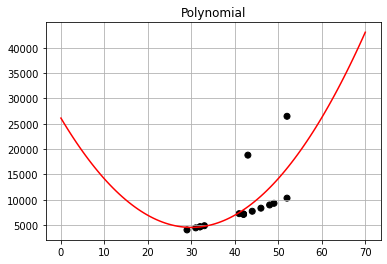

The Pearson Correlation Coefficient is 0.6453022121322012  with a P-value of P = 0.006943214656032424
17


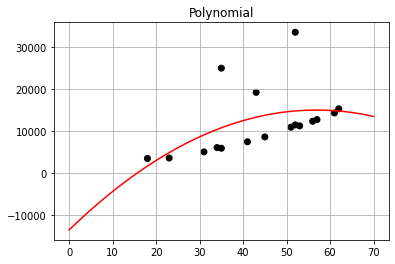

The Pearson Correlation Coefficient is 0.45603031158604423  with a P-value of P = 0.06579587035040299
8


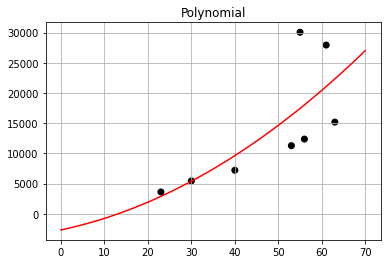

The Pearson Correlation Coefficient is 0.7292361226918928  with a P-value of P = 0.04009430783000657
11


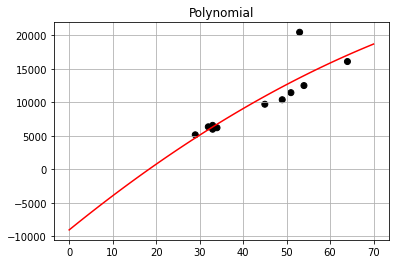

The Pearson Correlation Coefficient is 0.8669074069099668  with a P-value of P = 0.0005510921797489028
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


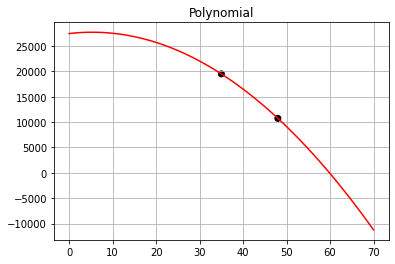

The Pearson Correlation Coefficient is -1.0  with a P-value of P = 1.0
0
THIS DATAFRAME IS EMPTY:4,0,4,1
0
THIS DATAFRAME IS EMPTY:4,0,5,0
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


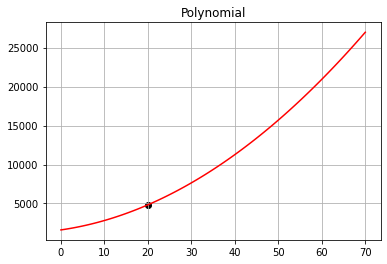

THIS DATAFRAME IS EMPTY:4,0,5,1
9


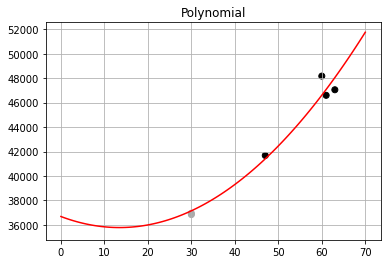

The Pearson Correlation Coefficient is 0.9751424996439225  with a P-value of P = 7.782076726763195e-06
10


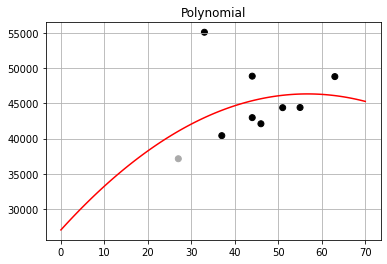

The Pearson Correlation Coefficient is 0.46030336349546325  with a P-value of P = 0.18067676174026542
9


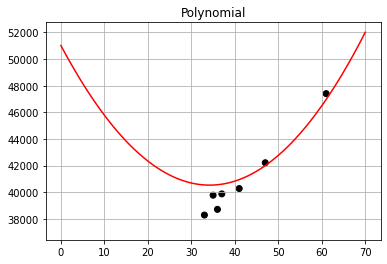

The Pearson Correlation Coefficient is 0.33343786557064964  with a P-value of P = 0.3805545622137215
4


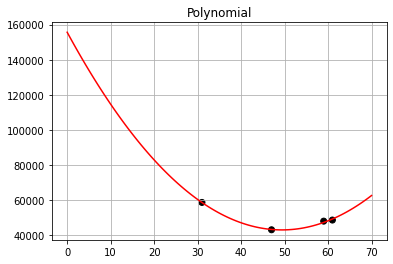

The Pearson Correlation Coefficient is -0.6572918751894954  with a P-value of P = 0.3427081248105046
11


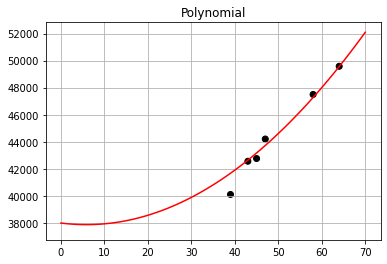

The Pearson Correlation Coefficient is 0.8809511709205501  with a P-value of P = 0.00034076665798954474
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


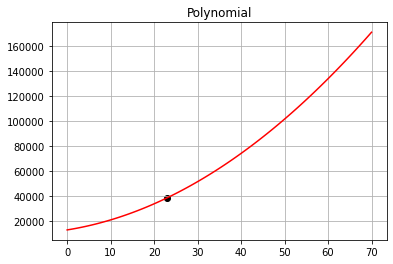

THIS DATAFRAME IS EMPTY:4,1,2,1
3


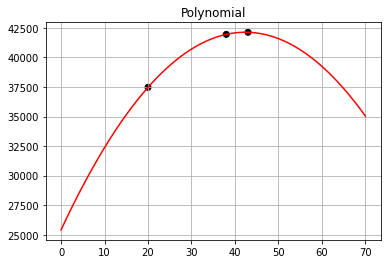

The Pearson Correlation Coefficient is 0.9847309081148903  with a P-value of P = 0.11139248318066208
3


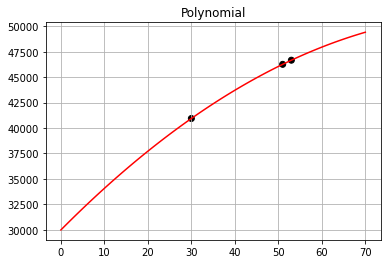

The Pearson Correlation Coefficient is 0.9998879171557297  with a P-value of P = 0.00953166453296363
0
THIS DATAFRAME IS EMPTY:4,1,4,0
0
THIS DATAFRAME IS EMPTY:4,1,4,1
0
THIS DATAFRAME IS EMPTY:4,1,5,0
0
THIS DATAFRAME IS EMPTY:4,1,5,1
18


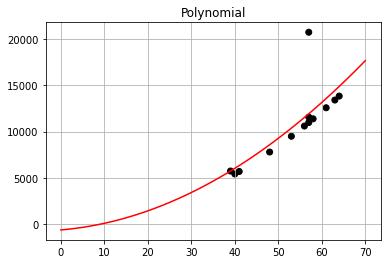

The Pearson Correlation Coefficient is 0.907589876871432  with a P-value of P = 1.994394703064087e-07
15


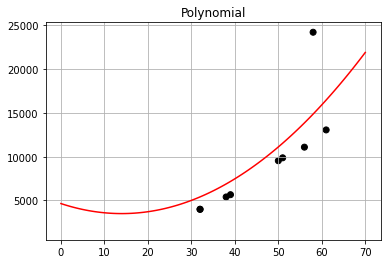

The Pearson Correlation Coefficient is 0.6747534503286343  with a P-value of P = 0.0057880826588239415
9


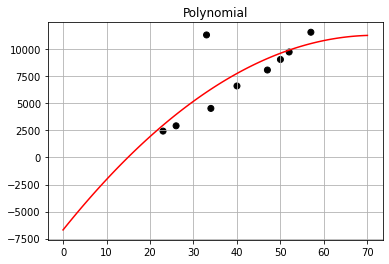

The Pearson Correlation Coefficient is 0.7777335725769859  with a P-value of P = 0.013608859384712905
7


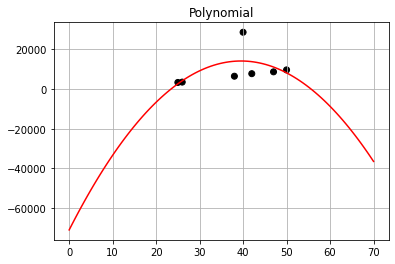

The Pearson Correlation Coefficient is 0.35332698532047696  with a P-value of P = 0.43690269603471643
6


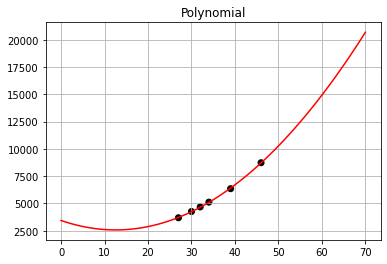

The Pearson Correlation Coefficient is 0.9929207043849168  with a P-value of P = 7.499724510975645e-05
5


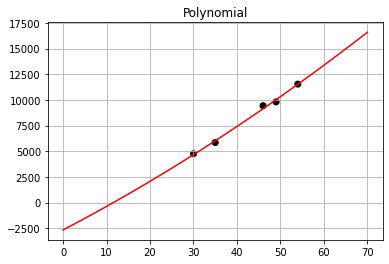

The Pearson Correlation Coefficient is 0.9972090537447434  with a P-value of P = 0.0001769209123434519
3


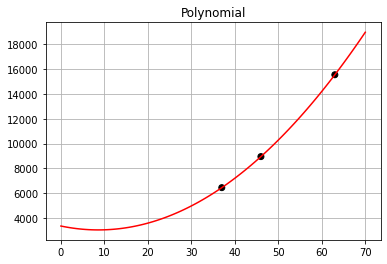

The Pearson Correlation Coefficient is 0.9969358653089755  with a P-value of P = 0.04984940784814611
3


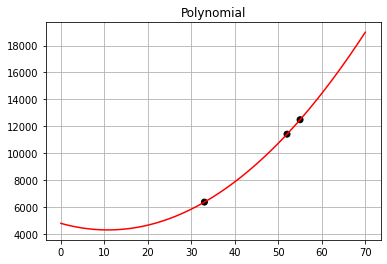

The Pearson Correlation Coefficient is 0.9992435962491647  with a P-value of P = 0.024762776428797966
0
THIS DATAFRAME IS EMPTY:5,0,4,0
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


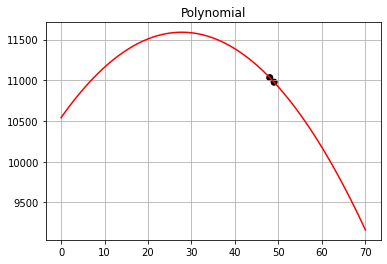

The Pearson Correlation Coefficient is -1.0  with a P-value of P = 1.0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


1


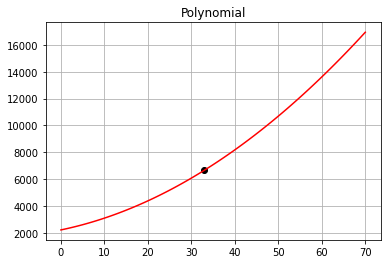

THIS DATAFRAME IS EMPTY:5,0,5,0
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


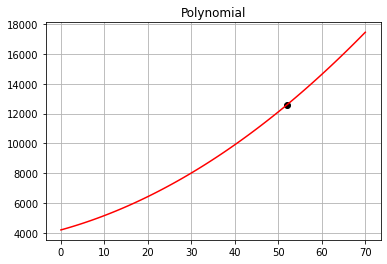

THIS DATAFRAME IS EMPTY:5,0,5,1
4


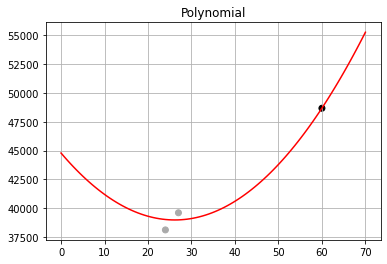

The Pearson Correlation Coefficient is 0.9674095126081074  with a P-value of P = 0.03259048739189263
3


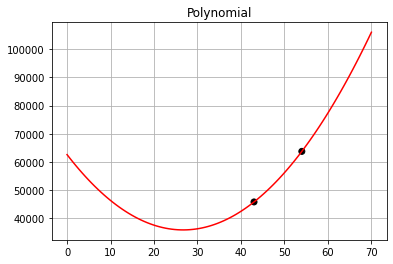

The Pearson Correlation Coefficient is 0.8932385947388808  with a P-value of P = 0.2968547606530435
3


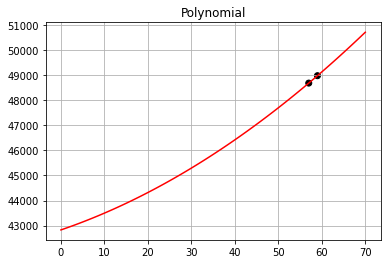

The Pearson Correlation Coefficient is 0.9999403787287066  with a P-value of P = 0.006951810012556102
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


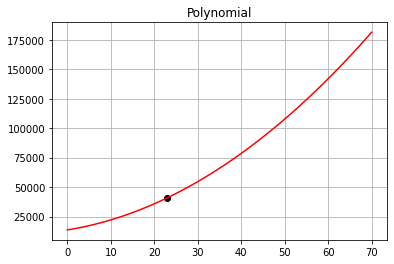

THIS DATAFRAME IS EMPTY:5,1,1,1
4


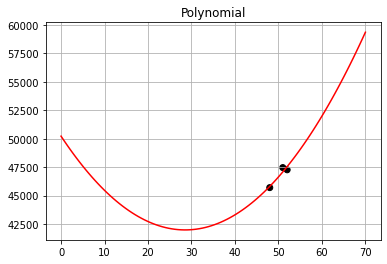

The Pearson Correlation Coefficient is 0.9794698381347425  with a P-value of P = 0.020530161865257468
3


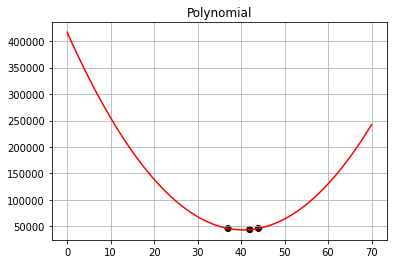

The Pearson Correlation Coefficient is -0.2075497617414114  with a P-value of P = 0.8669022161391398
3


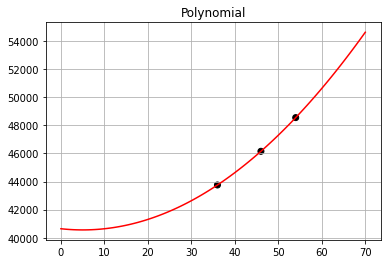

The Pearson Correlation Coefficient is 0.9979466621576238  with a P-value of P = 0.040803711395039785
0
THIS DATAFRAME IS EMPTY:5,1,3,1
0
THIS DATAFRAME IS EMPTY:5,1,4,0
0
THIS DATAFRAME IS EMPTY:5,1,4,1
0
THIS DATAFRAME IS EMPTY:5,1,5,0
0
THIS DATAFRAME IS EMPTY:5,1,5,1


In [ ]:
#region category removed
nodatalist2 = [] 
somedatalist2 = []
gooddatalist2 = []
for bminum in range(0,6):
    for smokenum in range(0,2):
        for childnum in range(0,6):
            for sexnum in range(0,2):
                try:
                    df_test = gm_df_cats[(gm_df_cats['bmicat']==bminum)& 
                                      (gm_df_cats["smoker"]==smokenum)& 
                                      (gm_df_cats["children"]==childnum)& 
                                      (gm_df_cats["sex"]==sexnum)]
                    print(len(df_test))
                    mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
                    lin = np.linspace(0, 70, 100)
                    plt.plot(lin, mypoly(lin), c='r',linestyle='-')
                    plt.title('Polynomial')
                    plt.grid(True)
                    plt.scatter(df_test["age"], df_test["charges"], c=df_test["gm cluster"], cmap="gray")
                    plt.show()
                    pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
                    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
                    somedatalist.append([bminum,smokenum,childnum,sexnum])
                    if p_value <= 0.05:
                      if pearson_coef > 0.90:
                        if pearson_coef < 1.0:
                          if len(df_test) > 4:
                            gooddatalist2.append([bminum,smokenum,childnum,sexnum])
                except:
                    print("THIS DATAFRAME IS EMPTY:{},{},{},{}".format(bminum,smokenum,childnum,sexnum))
                    nodatalist.append([bminum,smokenum,childnum,sexnum])

In [ ]:
print(gooddatalist2)

[[0, 0, 0, 1], [1, 0, 3, 0], [1, 0, 3, 1], [1, 1, 1, 1], [1, 1, 2, 1], [1, 1, 3, 1], [2, 1, 0, 1], [2, 1, 1, 1], [3, 0, 3, 0], [3, 1, 0, 1], [3, 1, 1, 0], [3, 1, 2, 0], [3, 1, 2, 1], [4, 0, 0, 1], [4, 1, 0, 0], [5, 0, 0, 0], [5, 0, 2, 0], [5, 0, 2, 1]]


In [ ]:
print(len(gooddatalist2))

18


In [ ]:
for item in gooddatalist2:
    df_test = gm_df_cats[(gm_df_cats['bmicat']==item[0])& 
                         (gm_df_cats["smoker"]==item[1])& 
                         (gm_df_cats["children"]==item[2])& 
                         (gm_df_cats["sex"]==item[3])]
    print(len(df_test))
    pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

5
The Pearson Correlation Coefficient is 0.9950171753104445  with a P-value of P = 0.00042191250825600763
9
The Pearson Correlation Coefficient is 0.9878778192428365  with a P-value of P = 6.381755774042782e-07
11
The Pearson Correlation Coefficient is 0.9958246312660115  with a P-value of P = 1.142728012211917e-10
6
The Pearson Correlation Coefficient is 0.9761052439059449  with a P-value of P = 0.0008496175857630973
5
The Pearson Correlation Coefficient is 0.9053095148969585  with a P-value of P = 0.034476780543755615
5
The Pearson Correlation Coefficient is 0.9831987117923277  with a P-value of P = 0.0026076553515686027
16
The Pearson Correlation Coefficient is 0.9794222593590216  with a P-value of P = 3.9679331850772496e-11
9
The Pearson Correlation Coefficient is 0.9807385169615499  with a P-value of P = 3.204719937922252e-06
22
The Pearson Correlation Coefficient is 0.9898411753019385  with a P-value of P = 2.0260282382374602e-18
12
The Pearson Correlation Coefficient is 0.953292

In [ ]:
#sex category and number of children category removed
nodatalist3 = [] 
somedatalist3 = []
gooddatalist3 = []
for bminum in range(0,6):
    for smokenum in range(0,2):     
        try:
            df_test = gm_df_cats[(gm_df_cats['bmicat']==bminum)& 
                              (gm_df_cats["smoker"]==smokenum)]
            print(len(df_test))
            print(df_test.head())
            pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
            print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
            somedatalist.append([bminum,smokenum,childnum,sexnum])
            if p_value <= 0.05:
              if pearson_coef > 0.90:
                if pearson_coef < 1.0:
                  if len(df_test) > 4:
                    gooddatalist3.append([bminum,smokenum,childnum,sexnum])
        except:
            print("THIS DATAFRAME IS EMPTY:{},{},{},{}".format(bminum,smokenum,childnum,sexnum))
            nodatalist.append([bminum,smokenum,childnum,sexnum])
        

15
     age  sex     bmi  children  ...     charges  bmicat  k cluster  gm cluster
28    23    0  17.385         1  ...  2775.19215       0          2           1
172   18    0  15.960         0  ...  1694.79640       0          2           3
198   51    1  18.050         0  ...  9644.25250       0          1           1
232   19    1  17.800         0  ...  1727.78500       0          2           3
410   19    0  17.480         0  ...  1621.34020       0          2           3

[5 rows x 10 columns]
The Pearson Correlation Coefficient is 0.991413550473711  with a P-value of P = 7.148344540613678e-13
5
      age  sex     bmi  children  ...      charges  bmicat  k cluster  gm cluster
128    32    1  17.765         2  ...  32734.18630       0          0           0
250    18    0  17.290         2  ...  12829.45510       0          2           0
380    27    1  17.955         2  ...  15006.57945       0          2           0
412    26    1  17.195         2  ...  14455.64405       0    

In [ ]:
print(gooddatalist3)
print(len(gooddatalist3))

[[0, 0, 5, 1]]
1


In this final plot of an example of 'good' data, it can also be seen that there is a natural variation in the datasets at a fundamental level, around a resonable well fitting polynomial degree 2 regression line of best fit. It can be seen there are even 2 data points on the left side of the graph at age 21 that vary in the charges that apply by approximately 500. 

In this instance, any prediction that is made by a given input, even in the very best scenario could vary by a wide range and many of the subplot seen earlier are dramatically more variable. 

As a result, any regression analysis by any machine learning algorithm would be fundamentally doomed to reach a high level of accuracy, but with an incredibly high margin of error and thus, incredibly poor precision in it's prediction based on a given set of inputs.

15


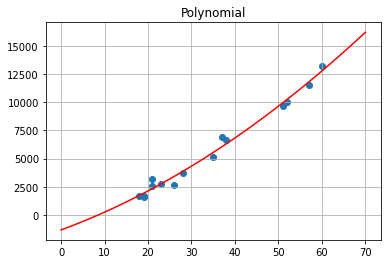

The Pearson Correlation Coefficient is 0.991413550473711  with a P-value of P = 7.148344540613678e-13


In [ ]:
for item in gooddatalist3:
    df_test = gm_df_cats[(gm_df_cats['bmicat']==item[0])& 
                         (gm_df_cats["smoker"]==item[1])]
    print(len(df_test))
    mypoly = np.poly1d(np.polyfit(df_test["age"], df_test["charges"], 2))
    lin = np.linspace(0, 70, 100)
    plt.plot(lin, mypoly(lin), c='r',linestyle='-')
    plt.title('Polynomial')
    plt.grid(True)
    plt.scatter(df_test["age"], df_test["charges"],)
    plt.show()
    pearson_coef, p_value = stats.pearsonr(df_test['age'], df_test['charges'])
    #mse = mean_squared_error(y_train, yhat
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

To conclude:
The dataset was of modest size, with clean data and a mixture of categorical and continuous numerical data variables.

The highest predictive power of the algorithms applied was with a RandomForestRegressor (89% accuracy), but in all instances of algorithms, a very high mean squared error was also seen, rendering any algorithm useless in its utility of any predictions.

The fundamental reason for this was shown by iterrating through all options of sub-groupings by category and plotting age against charges, a high level of variation could be seen in the majority of sub-groups, suggesting either an additional feature(s) in the dataset are contributing to target variable variation and are not given in the dataset, or that there are (in some cases) extremely high levels of noise (over 100% potential difference in prediction of charges rates for a given age and all equal input categories). In either case, this would prevent any accurate prediction of data based on input values.

Categorical predictions could be made - Smokers would have higher charges than non smokers, smokers with a BMI over 30 would have a higher level of charges than smokers with a lower BMI and all charges would increase with age, the trent for this increase appeared to follow a polynomial degree 2 line of best fit rather then a purely linear increase (as demonstrated on several sub-plots).